In [ ]:
#packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Data Reading

In [ ]:
cd /content/drive/MyDrive/Large_Data

/content/drive/MyDrive/Large_Data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('Sample Media Spend Data.csv', usecols=['Division', 'Calendar_Week', 'Paid_Views', 'Organic_Views',
       'Google_Impressions', 'Email_Impressions', 'Facebook_Impressions',
       'Affiliate_Impressions', 'Overall_Views', 'Sales'], parse_dates=['Calendar_Week'],infer_datetime_format=True)
df.head()

Division Calendar_Week  Paid_Views  Organic_Views  Google_Impressions  \
0        A    2018-01-06         392            422                 408   
1        A    2018-01-13         787            904                 110   
2        A    2018-01-20          81            970                 742   
3        A    2018-01-27          25            575                  65   
4        A    2018-02-03         565            284                 295   

   Email_Impressions  Facebook_Impressions  Affiliate_Impressions  \
0        349895.0107                 73580                  12072   
1        506270.2176                 11804                   9499   
2        430042.1538                 52232                  17048   
3        417745.6658                 78640                  10207   
4        408505.8012                 40561                   5834   

   Overall_Views  Sales  
0            682  59417  
1            853  56806  
2            759  48715  
3            942  72047  
4            658  56235

# Data Exploration and Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Division               3051 non-null   object        
 1   Calendar_Week          3051 non-null   datetime64[ns]
 2   Paid_Views             3051 non-null   int64         
 3   Organic_Views          3051 non-null   int64         
 4   Google_Impressions     3051 non-null   int64         
 5   Email_Impressions      3051 non-null   float64       
 6   Facebook_Impressions   3051 non-null   int64         
 7   Affiliate_Impressions  3051 non-null   int64         
 8   Overall_Views          3051 non-null   int64         
 9   Sales                  3051 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(1)
memory usage: 238.5+ KB


In [ ]:
# fix format for Calendar_Week

df.Calendar_Week.value_counts()

2018-01-06    27
2019-02-09    27
2019-08-10    27
2019-08-03    27
2019-07-27    27
              ..
2018-09-01    27
2018-08-25    27
2018-08-18    27
2018-08-11    27
2020-02-29    27
Name: Calendar_Week, Length: 113, dtype: int64

In [ ]:
df['Calendar_Week'] = pd.to_datetime(df['Calendar_Week'],format= 'mixed',dayfirst=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Division               3051 non-null   object        
 1   Calendar_Week          3051 non-null   datetime64[ns]
 2   Paid_Views             3051 non-null   int64         
 3   Organic_Views          3051 non-null   int64         
 4   Google_Impressions     3051 non-null   int64         
 5   Email_Impressions      3051 non-null   float64       
 6   Facebook_Impressions   3051 non-null   int64         
 7   Affiliate_Impressions  3051 non-null   int64         
 8   Overall_Views          3051 non-null   int64         
 9   Sales                  3051 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(1)
memory usage: 238.5+ KB


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.describe(exclude=['datetime','object'])

Paid_Views  Organic_Views  Google_Impressions  Email_Impressions  \
count    3051.000000    3051.000000        3.051000e+03       3.051000e+03   
mean    15093.941658   13355.673222        8.861738e+05       7.605094e+05   
std     30785.884979   24079.399689        1.355076e+06       6.260141e+05   
min         1.000000       1.000000        7.000000e+00       4.089445e+04   
25%       537.000000     712.500000        1.698280e+05       3.784969e+05   
50%      2699.000000    4110.000000        4.905310e+05       5.909708e+05   
75%     17358.000000   16230.500000        1.022622e+06       9.622466e+05   
max    518190.000000  270453.000000        1.715044e+07       7.317730e+06   

       Facebook_Impressions  Affiliate_Impressions  Overall_Views  \
count          3.051000e+03            3051.000000    3051.000000   
mean           2.691269e+05           22910.902655   27980.914127   
std            4.665117e+05           21617.637497   52054.976687   
min            2.900000e+01             910.000000       2.000000   
25%            5.707350e+04            9127.000000     747.000000   
50%            1.275230e+05           16658.000000    7879.000000   
75%            2.835050e+05           27486.500000   34111.500000   
max            7.558435e+06          175791.000000  635057.000000   

              Sales  
count  3.051000e+03  
mean   1.859014e+05  
std    2.322079e+05  
min    1.543600e+04  
25%    7.339350e+04  
50%    1.135730e+05  
75%    2.029755e+05  
max    3.575430e+06

# Division wise data exploration

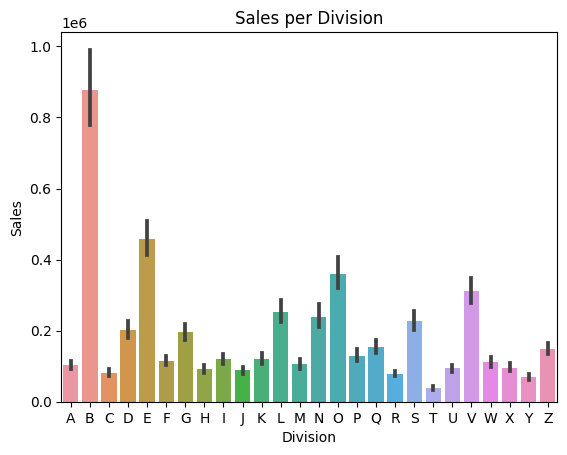

In [ ]:
df.groupby('Division')['Sales'].sum()
sns.barplot(x='Division', y='Sales', data=df).set_title("Sales per Division");

write the observations here




In [ ]:
# Identifying unique divisions
divisions = df['Division'].unique()

# Plotting for each division
for division in divisions:
    # Create a Plotly figure with 5 subplots, one for each type of plot
    fig = make_subplots(rows=5, cols=1, subplot_titles=[
        'Paid & Organic Views vs Sales',
        'Google Impressions vs Sales',
        'Email Impressions vs Sales',
        'Facebook Impressions vs Sales',
        'Affiliate Impressions vs Sales'])

    # Paid Views, Organic Views, and Sales
    grouped_df = df[df.Division == division].groupby('Calendar_Week').sum()
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Paid_Views'], mode='lines', name='Paid Views'), row=1, col=1)
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Organic_Views'], mode='lines', name='Organic Views'), row=1, col=1)
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Sales'], mode='lines', name='Sales'), row=1, col=1)

    # Google Impressions and Sales
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Google_Impressions'], mode='lines', name='Google Impressions'), row=2, col=1)
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Sales'], mode='lines', name='Sales'), row=2, col=1)

    # Email Impressions and Sales
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Email_Impressions'], mode='lines', name='Email Impressions'), row=3, col=1)
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Sales'], mode='lines', name='Sales'), row=3, col=1)

    # Facebook Impressions and Sales
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Facebook_Impressions'], mode='lines', name='Facebook Impressions'), row=4, col=1)
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Sales'], mode='lines', name='Sales'), row=4, col=1)

    # Affiliate Impressions and Sales
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Affiliate_Impressions'], mode='lines', name='Affiliate Impressions'), row=5, col=1)
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Sales'], mode='lines', name='Sales'), row=5, col=1)

    # Layout adjustments
    fig.update_layout(height=1500, width=800, title_text=f'Spending per Week for Division {division}', showlegend=False)
    fig.show()

Transforming data - for scalability

Just transform sales

In [ ]:
import numpy as np

# Applying log transformation to relevant columns
# Adding a small constant (1) to avoid log(0)
df['Log_Sales'] = np.log(df['Sales'] + 1)

# Verifying the transformation by showing the head of the DataFrame
df[['Paid_Views', 'Sales', 'Log_Sales']].head()

Paid_Views  Sales  Log_Sales
0         392  59417  10.992352
1         787  56806  10.947415
2          81  48715  10.793763
3          25  72047  11.185088
4         565  56235  10.937312

In [ ]:
df.head()

Division Calendar_Week  Paid_Views  Organic_Views  Google_Impressions  \
0        A    2018-01-06         392            422                 408   
1        A    2018-01-13         787            904                 110   
2        A    2018-01-20          81            970                 742   
3        A    2018-01-27          25            575                  65   
4        A    2018-02-03         565            284                 295   

   Email_Impressions  Facebook_Impressions  Affiliate_Impressions  \
0        349895.0107                 73580                  12072   
1        506270.2176                 11804                   9499   
2        430042.1538                 52232                  17048   
3        417745.6658                 78640                  10207   
4        408505.8012                 40561                   5834   

   Overall_Views  Sales  Log_Sales  
0            682  59417  10.992352  
1            853  56806  10.947415  
2            759  48715  10.793763  
3            942  72047  11.185088  
4            658  56235  10.937312

In [ ]:
# Identifying unique divisions
divisions = df['Division'].unique()

# Plotting for each division
for division in divisions:
    # Create a Plotly figure with 5 subplots, one for each type of plot
    fig = make_subplots(rows=5, cols=1, subplot_titles=[
        'Paid & Organic Views vs Sales',
        'Google Impressions vs Sales',
        'Email Impressions vs Sales',
        'Facebook Impressions vs Sales',
        'Affiliate Impressions vs Sales'])

    # Paid Views, Organic Views, and Sales
    grouped_df = df[df.Division == division].groupby('Calendar_Week').sum()
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Paid_Views'], mode='lines', name='Paid Views'), row=1, col=1)
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Organic_Views'], mode='lines', name='Organic Views'), row=1, col=1)
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Log_Sales'], mode='lines', name='Sales'), row=1, col=1)

    # Google Impressions and Sales
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Google_Impressions'], mode='lines', name='Google Impressions'), row=2, col=1)
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Log_Sales'], mode='lines', name='Sales'), row=2, col=1)

    # Email Impressions and Sales
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Email_Impressions'], mode='lines', name='Email Impressions'), row=3, col=1)
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Log_Sales'], mode='lines', name='Sales'), row=3, col=1)

    # Facebook Impressions and Sales
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Facebook_Impressions'], mode='lines', name='Facebook Impressions'), row=4, col=1)
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Log_Sales'], mode='lines', name='Sales'), row=4, col=1)

    # Affiliate Impressions and Sales
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Affiliate_Impressions'], mode='lines', name='Affiliate Impressions'), row=5, col=1)
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Log_Sales'], mode='lines', name='Sales'), row=5, col=1)

    # Layout adjustments
    fig.update_layout(height=1500, width=800, title_text=f'Spending per Week for Division {division}', showlegend=False)
    fig.show()

Transform all required

In [ ]:
df['Log_Paid_Views'] = np.log(df['Paid_Views'] + 1)
df['Log_Organic_Views'] = np.log(df['Organic_Views'] + 1)
df['Log_Google_Impressions'] = np.log(df['Google_Impressions'] + 1)
df['Log_Email_Impressions'] = np.log(df['Email_Impressions'] + 1)
df['Log_Facebook_Impressions'] = np.log(df['Facebook_Impressions'] + 1)
df['Log_Affiliate_Impressions'] = np.log(df['Affiliate_Impressions'] + 1)

In [ ]:
df.head()

Division Calendar_Week  Paid_Views  Organic_Views  Google_Impressions  \
0        A    2018-01-06         392            422                 408   
1        A    2018-01-13         787            904                 110   
2        A    2018-01-20          81            970                 742   
3        A    2018-01-27          25            575                  65   
4        A    2018-02-03         565            284                 295   

   Email_Impressions  Facebook_Impressions  Affiliate_Impressions  \
0        349895.0107                 73580                  12072   
1        506270.2176                 11804                   9499   
2        430042.1538                 52232                  17048   
3        417745.6658                 78640                  10207   
4        408505.8012                 40561                   5834   

   Overall_Views  Sales  Log_Sales  Log_Paid_Views  Log_Organic_Views  \
0            682  59417  10.992352        5.973810           6.047372   
1            853  56806  10.947415        6.669498           6.807935   
2            759  48715  10.793763        4.406719           6.878326   
3            942  72047  11.185088        3.258097           6.356108   
4            658  56235  10.937312        6.338594           5.652489   

   Log_Google_Impressions  Log_Email_Impressions  Log_Facebook_Impressions  \
0                6.013715              12.765391                 11.206142   
1                4.709530              13.134828                  9.376278   
2                6.610696              12.971641                 10.863470   
3                4.189655              12.942630                 11.272648   
4                5.690359              12.920264                 10.610587   

   Log_Affiliate_Impressions  
0                   9.398727  
1                   9.159047  
2                   9.743847  
3                   9.230927  
4                   8.671630

In [ ]:
# Identifying unique divisions
divisions = df['Division'].unique()

# Plotting for each division
for division in divisions:
    # Create a Plotly figure with 5 subplots, one for each type of plot
    fig = make_subplots(rows=5, cols=1, subplot_titles=[
        'Paid & Organic Views vs Sales',
        'Google Impressions vs Sales',
        'Email Impressions vs Sales',
        'Facebook Impressions vs Sales',
        'Affiliate Impressions vs Sales'])

    # Paid Views, Organic Views, and Sales
    grouped_df = df[df.Division == division].groupby('Calendar_Week').sum()
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Log_Paid_Views'], mode='lines', name='Paid Views'), row=1, col=1)
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Log_Organic_Views'], mode='lines', name='Organic Views'), row=1, col=1)
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Log_Sales'], mode='lines', name='Sales'), row=1, col=1)

    # Google Impressions and Sales
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Log_Google_Impressions'], mode='lines', name='Google Impressions'), row=2, col=1)
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Log_Sales'], mode='lines', name='Sales'), row=2, col=1)

    # Email Impressions and Sales
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Log_Email_Impressions'], mode='lines', name='Email Impressions'), row=3, col=1)
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Log_Sales'], mode='lines', name='Sales'), row=3, col=1)

    # Facebook Impressions and Sales
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Log_Facebook_Impressions'], mode='lines', name='Facebook Impressions'), row=4, col=1)
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Log_Sales'], mode='lines', name='Sales'), row=4, col=1)

    # Affiliate Impressions and Sales
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Log_Affiliate_Impressions'], mode='lines', name='Affiliate Impressions'), row=5, col=1)
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Log_Sales'], mode='lines', name='Sales'), row=5, col=1)

    # Layout adjustments
    fig.update_layout(height=1500, width=800, title_text=f'Spending per Week for Division {division}', showlegend=False)
    fig.show()

Adding Lag - using delayed adstock function (Geometric Adstock function)

In [ ]:
# Define the Adstock function parameters
alpha = 0.2  # Adstock factor
lag = 2     # Lag value

# Columns to apply Adstock to
columns_to_adstock = ['Paid_Views', 'Organic_Views', 'Google_Impressions', 'Email_Impressions', 'Facebook_Impressions', 'Affiliate_Impressions']

# # Create a new DataFrame to store the Adstocked values
# adstocked_df = df.copy()

# Apply Adstock function to each specified column
for column in columns_to_adstock:
    adstocked_values = []
    for t in range(len(df)):
        adstock = 0
        for j in range(lag + 1):
            if t - j >= 0:
                adstock += (alpha ** j) * df.loc[t - j, column]
        adstocked_values.append(adstock)
    df[column + '_Adstocked'] = adstocked_values

In [ ]:
df.head()

Division Calendar_Week  Paid_Views  Organic_Views  Google_Impressions  \
0        A    2018-01-06         392            422                 408   
1        A    2018-01-13         787            904                 110   
2        A    2018-01-20          81            970                 742   
3        A    2018-01-27          25            575                  65   
4        A    2018-02-03         565            284                 295   

   Email_Impressions  Facebook_Impressions  Affiliate_Impressions  \
0        349895.0107                 73580                  12072   
1        506270.2176                 11804                   9499   
2        430042.1538                 52232                  17048   
3        417745.6658                 78640                  10207   
4        408505.8012                 40561                   5834   

   Overall_Views  Sales  ...  Log_Google_Impressions  Log_Email_Impressions  \
0            682  59417  ...                6.013715              12.765391   
1            853  56806  ...                4.709530              13.134828   
2            759  48715  ...                6.610696              12.971641   
3            942  72047  ...                4.189655              12.942630   
4            658  56235  ...                5.690359              12.920264   

   Log_Facebook_Impressions  Log_Affiliate_Impressions  Paid_Views_Adstocked  \
0                 11.206142                   9.398727                392.00   
1                  9.376278                   9.159047                865.40   
2                 10.863470                   9.743847                254.08   
3                 11.272648                   9.230927                 72.68   
4                 10.610587                   8.671630                573.24   

   Organic_Views_Adstocked  Google_Impressions_Adstocked  \
0                   422.00                        408.00   
1                   988.40                        191.60   
2                  1167.68                        780.32   
3                   805.16                        217.80   
4                   437.80                        337.68   

   Email_Impressions_Adstocked  Facebook_Impressions_Adstocked  \
0                349895.010700                        73580.00   
1                576249.219740                        26520.00   
2                545291.997748                        57536.00   
3                524004.905264                        89558.56   
4                509256.620512                        58378.28   

   Affiliate_Impressions_Adstocked  
0                         12072.00  
1                         11913.40  
2                         19430.68  
3                         13996.56  
4                          8557.32  

[5 rows x 23 columns]

In [ ]:
plot_df = df[df.Division=='A'][['Calendar_Week','Google_Impressions','Google_Impressions_Adstocked']]
plot_df

Calendar_Week  Google_Impressions  Google_Impressions_Adstocked
0      2018-01-06                 408                        408.00
1      2018-01-13                 110                        191.60
2      2018-01-20                 742                        780.32
3      2018-01-27                  65                        217.80
4      2018-02-03                 295                        337.68
..            ...                 ...                           ...
108    2020-02-01              565733                     679282.32
109    2020-02-08              574706                     708049.52
110    2020-02-15              432938                     570508.52
111    2020-02-22              442591                     552166.84
112    2020-02-29              430426                     536261.72

[113 rows x 3 columns]

In [ ]:
# Identifying unique divisions
divisions = df['Division'].unique()

# Plotting for each division
for division in divisions:
    # Create a Plotly figure with 2 subplots, one for each type of plot
    fig = make_subplots(rows=1, cols=1, subplot_titles=[
        'Google Impressions vs Google Impressions Adstocked vs Sales'])

    # Paid Views, Organic Views, and Sales
    grouped_df = df[df.Division == division].groupby('Calendar_Week').sum()

    # Google Impressions and Sales
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Google_Impressions'], mode='lines', name='Google Impressions'), row=1, col=1)
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Sales'], mode='lines', name='Sales'), row=1, col=1)

    # Google Impressions Adstocked and Sales
    fig.add_trace(go.Scatter(x=grouped_df.index, y=grouped_df['Google_Impressions_Adstocked'], mode='lines', name='Google Impressions Adstocked'), row=1, col=1)

    # Layout adjustments
    fig.update_layout(height=400, width=800, title_text=f'Spending per Week for Division {division}', showlegend=True)

    # Update y-axis label for the right y-axis
    fig.update_yaxes(title_text="Sales", showline=True, linecolor='blue', row=1, col=1, secondary_y=True)

    fig.show()

# Statistical Inferences - Basic Regression

In [ ]:
# Create a DataFrame with relevant columns
data = df[['Paid_Views', 'Organic_Views','Google_Impressions', 'Email_Impressions', 'Facebook_Impressions', 'Affiliate_Impressions', 'Log_Sales']]

# Add a constant for the intercept term
data = sm.add_constant(data)

# Fit a multiple linear regression model
model = sm.OLS(data['Log_Sales'], data[['const','Paid_Views', 'Organic_Views', 'Google_Impressions', 'Email_Impressions', 'Facebook_Impressions', 'Affiliate_Impressions']])
results = model.fit()

# Print the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:              Log_Sales   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1047.
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:25:13   Log-Likelihood:                -1899.2
No. Observations:                3051   AIC:                             3812.
Df Residuals:                    3044   BIC:                             3855.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.03

In [ ]:
#Multicollinearity fixed

# Create a DataFrame with relevant columns
data = df[['Log_Paid_Views', 'Log_Organic_Views','Log_Google_Impressions', 'Log_Email_Impressions', 'Log_Facebook_Impressions', 'Log_Affiliate_Impressions', 'Log_Sales']]

# Add a constant for the intercept term
data = sm.add_constant(data)

# Fit a multiple linear regression model
model = sm.OLS(data['Log_Sales'], data[['const', 'Log_Paid_Views', 'Log_Organic_Views', 'Log_Google_Impressions', 'Log_Email_Impressions', 'Log_Facebook_Impressions', 'Log_Affiliate_Impressions']])
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Sales   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     1259.
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:25:13   Log-Likelihood:                -1703.7
No. Observations:                3051   AIC:                             3421.
Df Residuals:                    3044   BIC:                             3464.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
#Multicollinearity but better explained -> some features need to be dropped - decison needed

# Create a DataFrame with relevant columns
data = df[['Paid_Views_Adstocked', 'Organic_Views_Adstocked', 'Google_Impressions_Adstocked', 'Email_Impressions_Adstocked', 'Facebook_Impressions_Adstocked', 'Affiliate_Impressions_Adstocked', 'Sales']]

# Add a constant for the intercept term
data = sm.add_constant(data)

# Fit a multiple linear regression model
model = sm.OLS(data['Sales'], data[['const', 'Paid_Views_Adstocked', 'Organic_Views_Adstocked','Google_Impressions_Adstocked', 'Email_Impressions_Adstocked', 'Facebook_Impressions_Adstocked', 'Affiliate_Impressions_Adstocked']])
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     2069.
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:25:13   Log-Likelihood:                -39546.
No. Observations:                3051   AIC:                         7.911e+04
Df Residuals:                    3044   BIC:                         7.915e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Need to scale - transform scikit learn all values (with log sales) then make model using scikit learn

Can use lag for bayesian application



# Modelling

## Ridge linear regression with sales

values scaled

In [ ]:
df_1  = df[['Paid_Views', 'Organic_Views', 'Google_Impressions', 'Email_Impressions', 'Facebook_Impressions', 'Affiliate_Impressions', 'Sales']]

In [ ]:
train_size = 0.7
train_data, temp_data, train_target, temp_target = train_test_split(df_1.drop(columns=['Sales']), df_1['Sales'], train_size=train_size, random_state=42)

test_size = 0.5
validation_data, test_data, validation_target, test_target = train_test_split(temp_data, temp_target, test_size=test_size, random_state=42)

scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
validation_data_scaled = scaler.transform(validation_data)
test_data_scaled = scaler.transform(test_data)

In [ ]:
train_data_scaled

array([[ 0.0629591 , -0.27332138, -0.56169684, -0.4111154 , -0.07006194,
        -0.64322531],
       [ 2.10795448,  1.63631212,  0.48217213,  0.58537622,  0.11269717,
         2.40317775],
       [-0.46777909, -0.54062524, -0.2950437 , -0.88604049, -0.49757807,
        -0.78094935],
       ...,
       [-0.48013737, -0.54757048, -0.67770998, -0.35234015, -0.36959093,
         0.25066302],
       [-0.10568137, -0.28545357,  0.07788473,  0.78338873, -0.4207372 ,
        -0.34584305],
       [-0.27328642, -0.3391693 , -0.38695638, -0.70481796, -0.43045279,
        -0.73011478]])

Tested on validation set

In [ ]:
alpha = 1.0
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(train_data_scaled, train_target)

y_pred_ridge = ridge_model.predict(validation_data)

# Evaluate the model
mse_ridge = mean_squared_error(validation_target, y_pred_ridge)
r2_ridge = r2_score(validation_target, y_pred_ridge)

mse_ridge

4.658391034637953e+22

In [ ]:
r2_ridge

-777399475675.8528

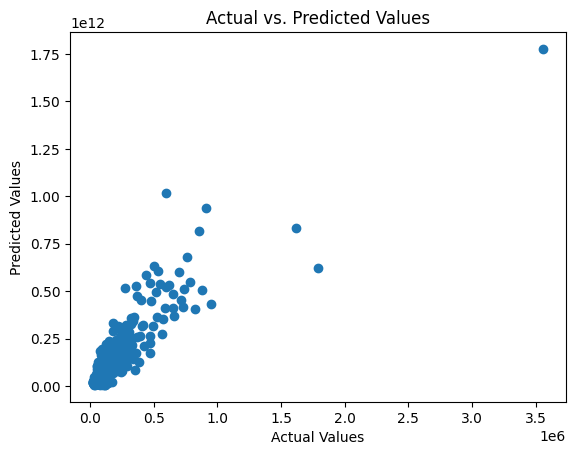

In [ ]:
plt.scatter(validation_target, y_pred_ridge)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


In [ ]:
feature_contributions = pd.DataFrame({'Feature': train_data.columns, 'Coefficient': ridge_model.coef_})
feature_contributions = feature_contributions.sort_values(by='Coefficient', ascending=False)
feature_contributions

Feature    Coefficient
3      Email_Impressions  100487.181832
4   Facebook_Impressions   90735.380778
2     Google_Impressions   52564.148638
1          Organic_Views   11416.473958
0             Paid_Views  -11040.528351
5  Affiliate_Impressions  -13182.845667

Test on test set

In [ ]:
y_pred_ridge = ridge_model.predict(test_data)

# Evaluate the model
mse_ridge = mean_squared_error(test_target, y_pred_ridge)
r2_ridge = r2_score(test_target, y_pred_ridge)

mse_ridge

5.630888010698722e+22

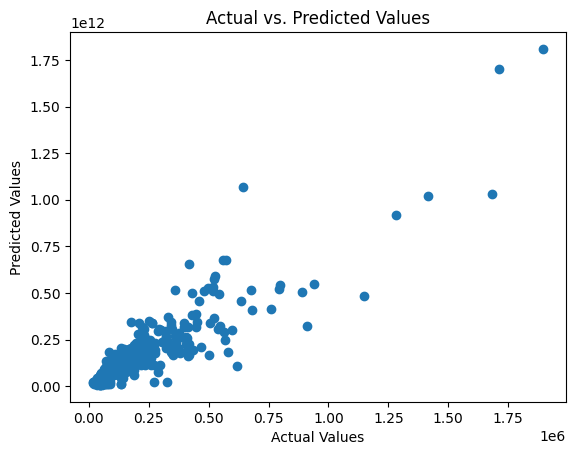

In [ ]:
plt.scatter(test_target, y_pred_ridge)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [ ]:
feature_contributions = pd.DataFrame({'Feature': train_data.columns, 'Coefficient': ridge_model.coef_})
feature_contributions = feature_contributions.sort_values(by='Coefficient', ascending=False)
feature_contributions

Feature    Coefficient
3      Email_Impressions  100487.181832
4   Facebook_Impressions   90735.380778
2     Google_Impressions   52564.148638
1          Organic_Views   11416.473958
0             Paid_Views  -11040.528351
5  Affiliate_Impressions  -13182.845667

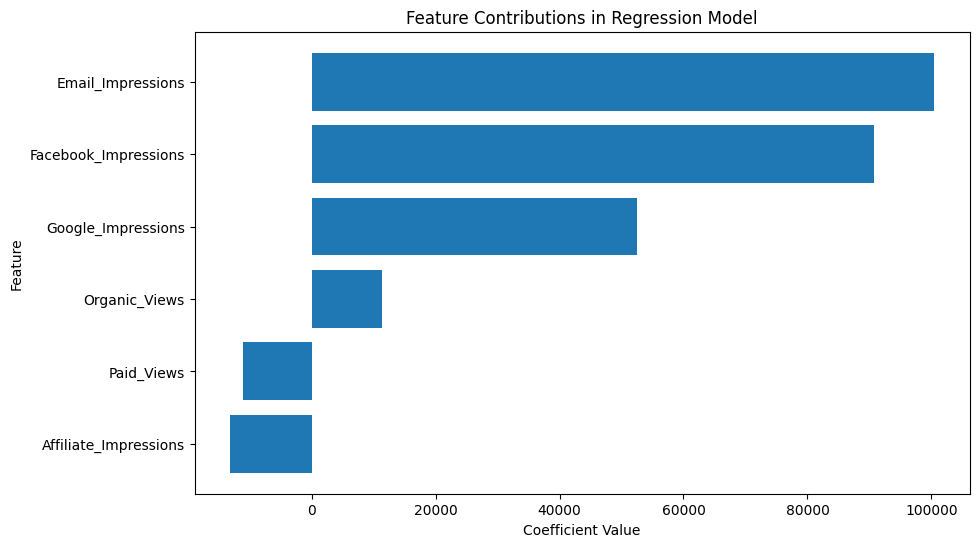

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_contributions['Feature'], feature_contributions['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Contributions in Regression Model')
plt.gca().invert_yaxis()
plt.show()

Need to try other models ;

improve performance on validation set and then maybe keep test as unseen set and use as recommendation giving

## Ridge linear regression with sales + Adstocked

adstock (lagged) values used

In [ ]:
df_2 = df[['Paid_Views_Adstocked', 'Organic_Views_Adstocked','Google_Impressions_Adstocked', 'Email_Impressions_Adstocked', 'Facebook_Impressions_Adstocked', 'Affiliate_Impressions_Adstocked', 'Sales']]

In [ ]:
train_size = 0.7
train_data, temp_data, train_target, temp_target = train_test_split(df_2.drop(columns=['Sales']), df_2['Sales'], train_size=train_size, random_state=42)

test_size = 0.5
validation_data, test_data, validation_target, test_target = train_test_split(temp_data, temp_target, test_size=test_size, random_state=42)

scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
validation_data_scaled = scaler.transform(validation_data)
test_data_scaled = scaler.transform(test_data)

In [ ]:
alpha = 1.0
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(train_data_scaled, train_target)

y_pred_ridge = ridge_model.predict(validation_data)

# Evaluate the model
mse_ridge = mean_squared_error(validation_target, y_pred_ridge)
r2_ridge = r2_score(validation_target, y_pred_ridge)

mse_ridge

7.091837839118632e+22

In [ ]:
r2_ridge

-1183496828994.7158

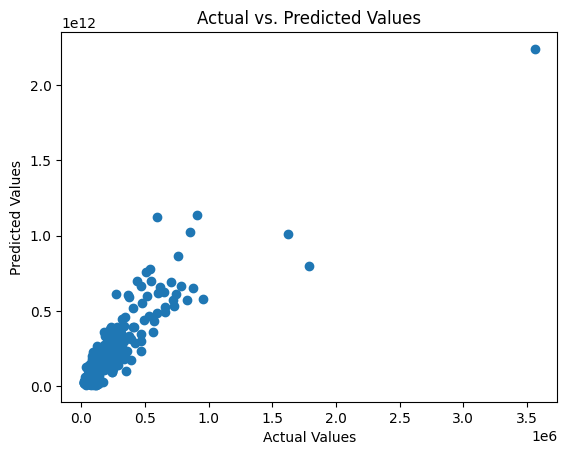

In [ ]:
plt.scatter(validation_target, y_pred_ridge)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [ ]:
feature_contributions = pd.DataFrame({'Feature': train_data.columns, 'Coefficient': ridge_model.coef_})
feature_contributions = feature_contributions.sort_values(by='Coefficient', ascending=False)
feature_contributions

Feature   Coefficient
3      Email_Impressions_Adstocked  95872.006687
4   Facebook_Impressions_Adstocked  95562.857819
2     Google_Impressions_Adstocked  55114.999393
1          Organic_Views_Adstocked  10890.221338
5  Affiliate_Impressions_Adstocked -13377.714197
0             Paid_Views_Adstocked -14304.236314

<h3> Email winning </h3>

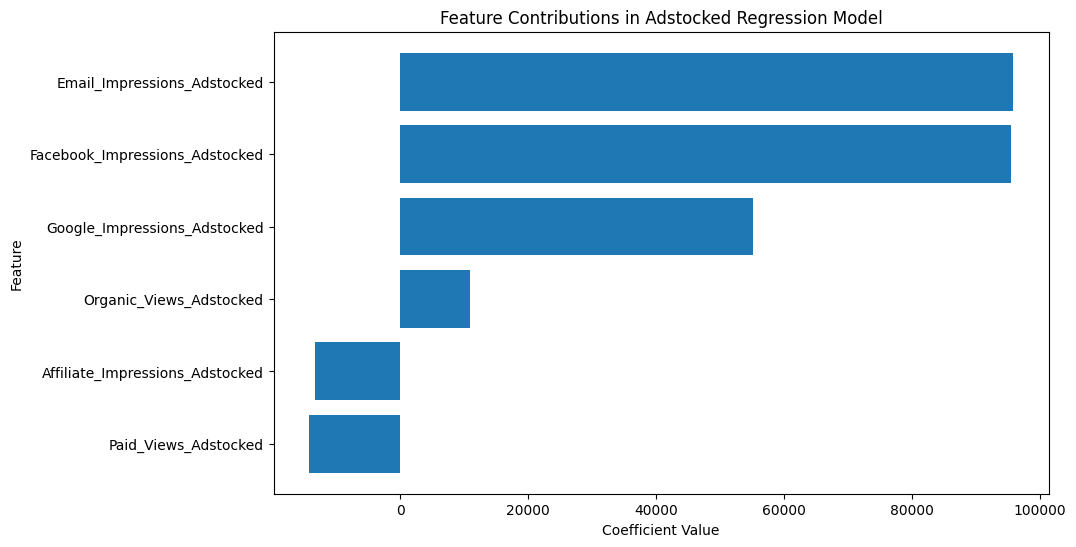

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_contributions['Feature'], feature_contributions['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Contributions in Adstocked Regression Model')
plt.gca().invert_yaxis()
plt.show()

## Specialised library

In [ ]:
#!pip install --upgrade git+https://github.com/google/lightweight_mmm.git

In [ ]:
# Import the relevant modules of the library
from lightweight_mmm import lightweight_mmm
from lightweight_mmm import optimize_media
from lightweight_mmm import plot
from lightweight_mmm import preprocessing
from lightweight_mmm import utils

In [ ]:
# 1. media variables
# media spending
mdsp_cols= ['Paid_Views', 'Organic_Views', 'Google_Impressions', 'Email_Impressions', 'Facebook_Impressions', 'Affiliate_Impressions']

# 2. sales variables
sales_cols =['Sales']


In [ ]:

SEED = 105
data_size = len(df)

n_media_channels = len(mdsp_cols)

media_data = df[mdsp_cols].to_numpy()
target = df['Sales'].to_numpy()
costs = df[mdsp_cols].sum().to_numpy()

In [ ]:

# Split and scale data.
test_data_period_size = 24
split_point = data_size - test_data_period_size
# Media data
media_data_train = media_data[:split_point, ...]
media_data_test = media_data[split_point:, ...]

# Target
target_train = target[:split_point]

In [ ]:

import jax.numpy as jnp
import numpyro

In [ ]:
media_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
target_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
cost_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean, multiply_by=0.15)

media_data_train = media_scaler.fit_transform(media_data_train)
target_train = target_scaler.fit_transform(target_train)
costs = cost_scaler.fit_transform(costs)

In [ ]:
mmm = lightweight_mmm.LightweightMMM(model_name="hill_adstock")

In [ ]:

number_warmup=1000
number_samples=1000

In [ ]:
mmm.fit(
    media=media_data_train,
    media_prior=costs,
    target=target_train,
    number_warmup=number_warmup,
    number_samples=number_samples,
    media_names = mdsp_cols,
    seed=SEED)

sample: 100%|██████████| 2000/2000 [42:52<00:00,  1.29s/it, 1023 steps of size 3.02e-04. acc. prob=0.95]


In [ ]:
file_path = "media_mix_model.pkl"
utils.save_model(media_mix_model=mmm, file_path=file_path)

In [ ]:
mmm.print_summary()


                                         mean       std    median      5.0%     95.0%     n_eff     r_hat
                      coef_media[0]      0.01      0.00      0.01      0.00      0.01      4.29      2.35
                      coef_media[1]      0.00      0.00      0.00      0.00      0.01      1.26      2.18
                      coef_media[2]      4.50      4.02      4.12      0.46      8.73      1.00     27.47
                      coef_media[3]      1.56      1.26      1.36      0.28      2.94      1.01     12.88
                      coef_media[4]      0.80      0.72      0.72      0.08      1.58      1.00     18.83
                      coef_media[5]      0.00      0.00      0.00      0.00      0.00      1.02      6.54
                      coef_trend[0]     -0.00      0.00     -0.00     -0.00     -0.00      7.39      1.40
                         expo_trend      1.21      0.12      1.28      1.04      1.32      1.27      3.71
             gamma_seasonality[0,0]      0.00

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning:

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.



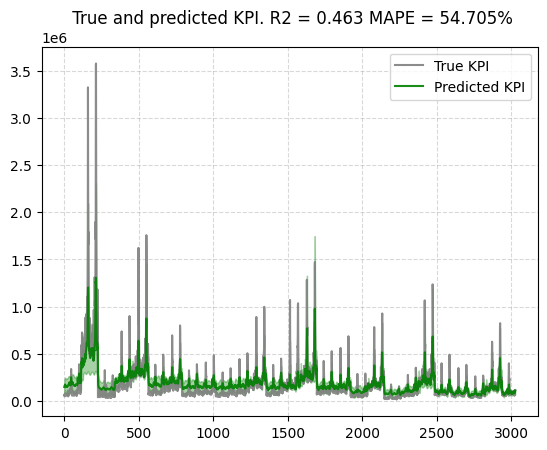

In [ ]:
plot.plot_model_fit(mmm, target_scaler=target_scaler)

In [ ]:
new_predictions = mmm.predict(media=media_scaler.transform(media_data_test),
                              seed=SEED)

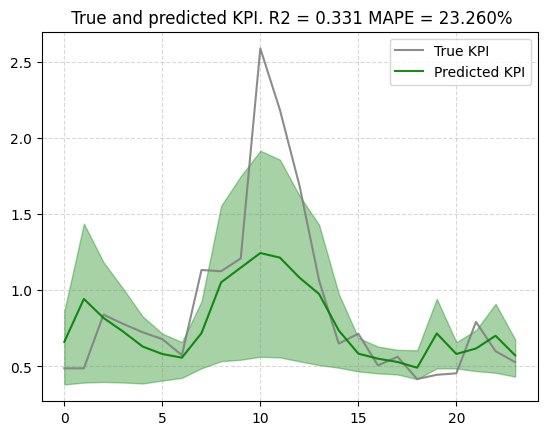

In [ ]:
plot.plot_out_of_sample_model_fit(out_of_sample_predictions=new_predictions,
                                 out_of_sample_target=target_scaler.transform(target[split_point:]))

In [ ]:
media_contribution, roi_hat = mmm.get_posterior_metrics(target_scaler=target_scaler, cost_scaler=cost_scaler)

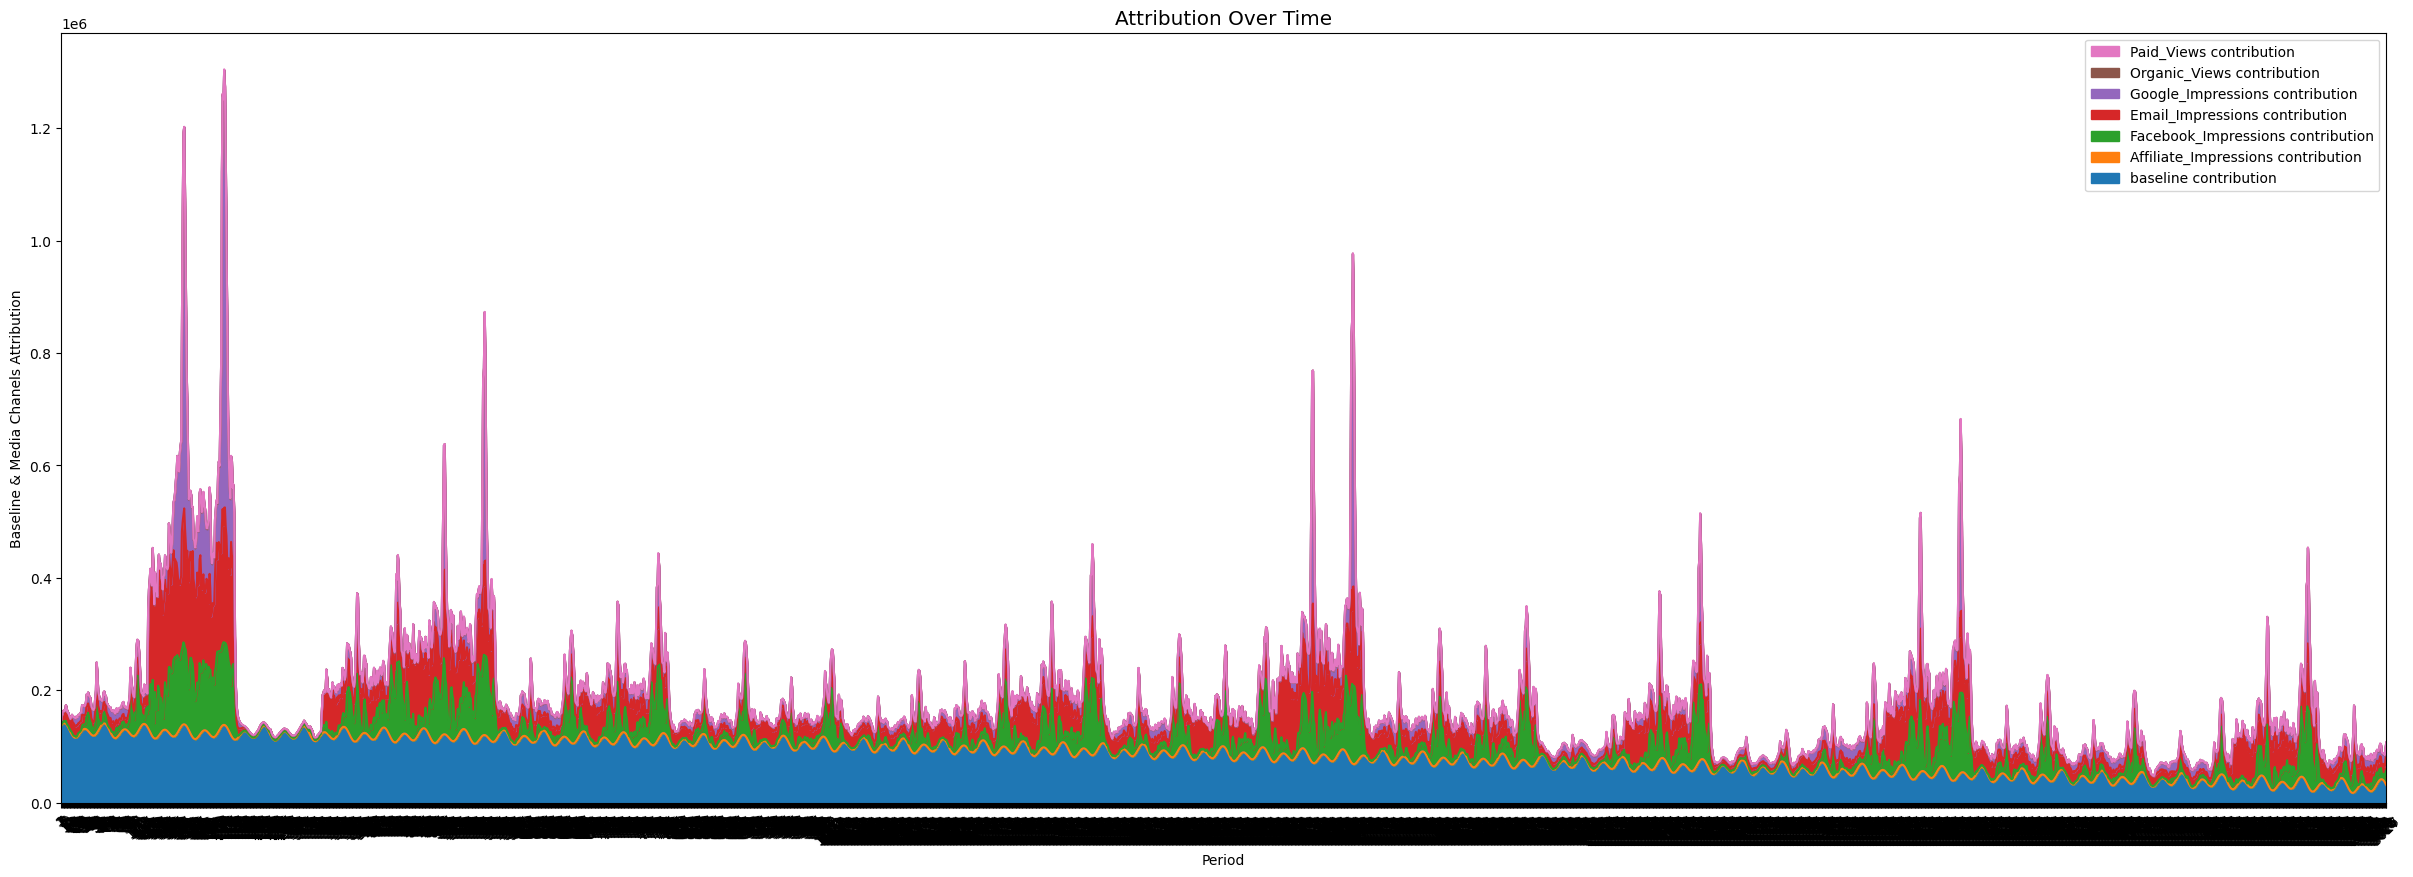

In [ ]:
plot.plot_media_baseline_contribution_area_plot(media_mix_model=mmm,
                                                target_scaler=target_scaler,
                                                fig_size=(30,10),
                                                channel_names = mdsp_cols
                                                )

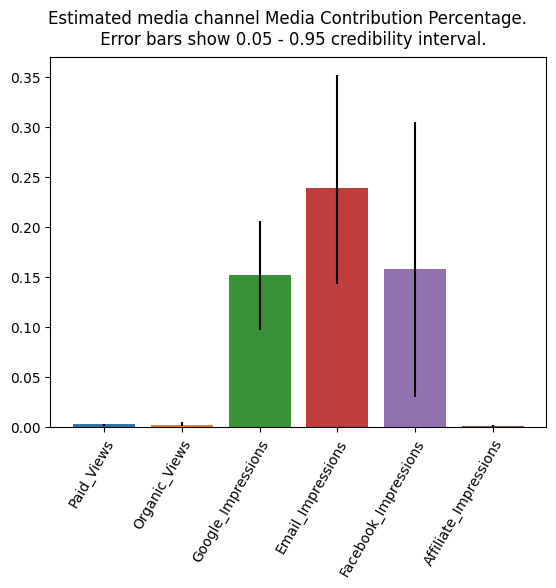

In [ ]:
plot.plot_bars_media_metrics(metric=media_contribution, metric_name="Media Contribution Percentage", channel_names=mdsp_cols)

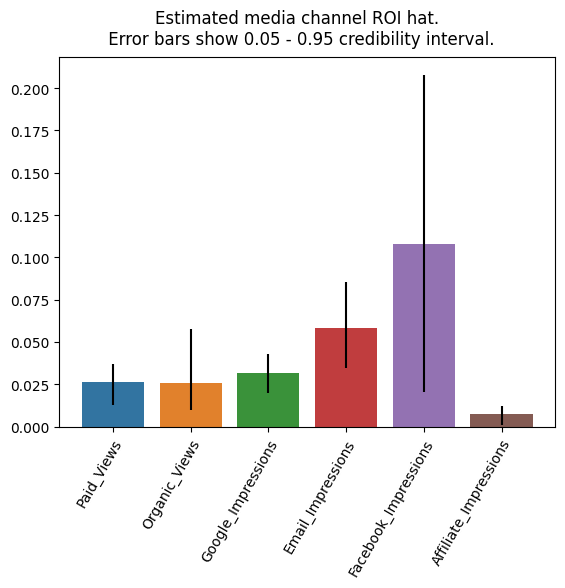

In [ ]:

plot.plot_bars_media_metrics(metric=roi_hat, metric_name="ROI hat", channel_names=mdsp_cols)

how each media channel behaves individually as we invest more in it

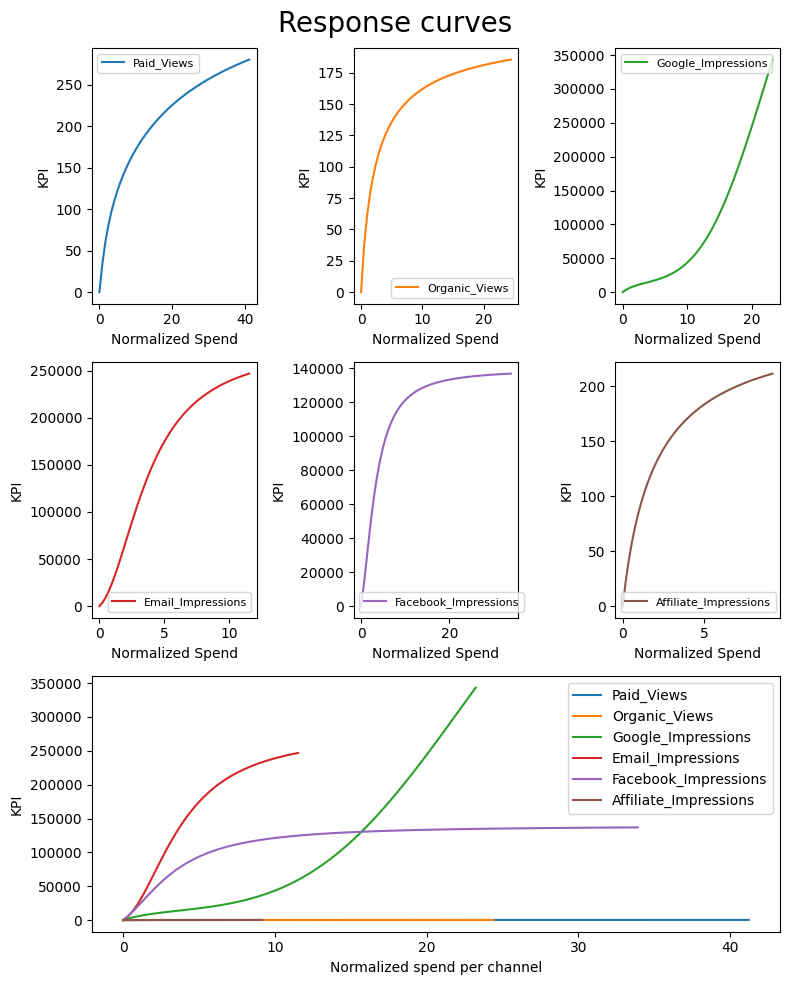

In [ ]:
plot.plot_response_curves(media_mix_model=mmm, target_scaler=target_scaler, seed=SEED)

Optimization

In [ ]:
prices = jnp.ones(mmm.n_media_channels)

In [ ]:
n_time_periods = 20
budget = jnp.sum(jnp.dot(prices, media_data.mean(axis=0)))* n_time_periods

In [ ]:
# Run optimization with the parameters of choice.
solution, kpi_without_optim, previous_media_allocation = optimize_media.find_optimal_budgets(
    n_time_periods=n_time_periods,
    media_mix_model=mmm,
    budget=budget,
    prices=prices,
    media_scaler=media_scaler,
    target_scaler=target_scaler,
    seed=SEED)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -2811003.3043110077
            Iterations: 52
            Function evaluations: 663
            Gradient evaluations: 51


In [ ]:
# Obtain the optimal weekly allocation.
optimal_buget_allocation = prices * solution.x
optimal_buget_allocation

Array([  241363.27,   212917.22, 14176474.  , 17924970.  ,  6419355.5 ,
         368328.3 ], dtype=float32)

In [ ]:
# similar renormalization to get previous budget allocation
previous_budget_allocation = prices * previous_media_allocation
previous_budget_allocation

Array([  301821.6 ,   266250.2 , 17727494.  , 15235705.  ,  5351547.  ,
         460589.75], dtype=float32)

In [ ]:
# Both these values should be very close in order to compare KPI
budget, optimal_buget_allocation.sum()

(Array(39343408., dtype=float32), Array(39343408., dtype=float32))

In [ ]:
# Both numbers should be almost equal
budget, jnp.sum(solution.x * prices)

(Array(39343408., dtype=float32), Array(39343408., dtype=float32))

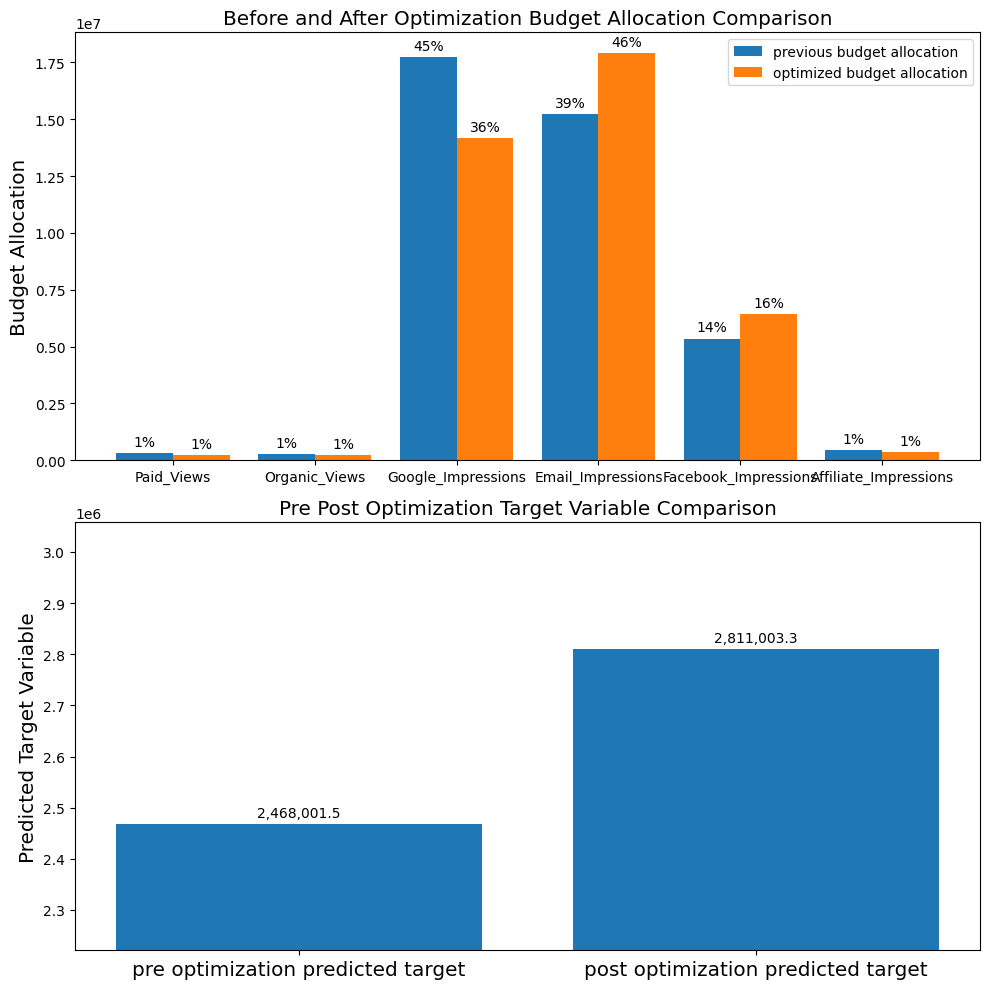

In [ ]:

# Plot out pre post optimization budget allocation and predicted target variable comparison.
plot.plot_pre_post_budget_allocation_comparison(media_mix_model=mmm,
                                                kpi_with_optim=solution['fun'],
                                                kpi_without_optim=kpi_without_optim,
                                                optimal_buget_allocation=optimal_buget_allocation,
                                                previous_budget_allocation=previous_budget_allocation,
                                                figure_size=(10,10),
                                                channel_names = mdsp_cols)